## Hierarchical Clustering (Linkage Analysis)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from itertools import cycle, islice

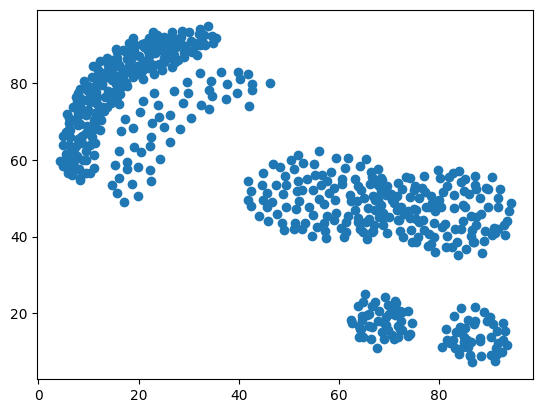

In [2]:
data = pd.read_csv("Hierarchical_Clustering_data.csv")

fig = plt.scatter(data['Feature1'], data['Feature2'])

In [3]:
# setting distance_threshold=0 to get the full tree.
cluster_tree = AgglomerativeClustering(linkage = 'single', distance_threshold=0, n_clusters=None)
# linkage{‘ward’, ‘complete’, ‘average’, ‘single’}

# perform clustering
cluster_tree = cluster_tree.fit( data )

In [3]:
data

,Feature1,Feature2
0,18.170,90.681
1,18.830,91.935
2,19.355,89.893
3,20.673,90.202
4,21.332,90.671
...,...,...
572,82.684,56.727
573,90.456,55.446
574,92.164,52.458
575,94.267,48.684


In [4]:
def plot_dendrogram(ct, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # get the counts of samples under each node
    counts = np.zeros(ct.children_.shape[0])
    n_samples = len(ct.labels_)
    for i, merge in enumerate(ct.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack( [ct.children_, ct.distances_, counts] ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

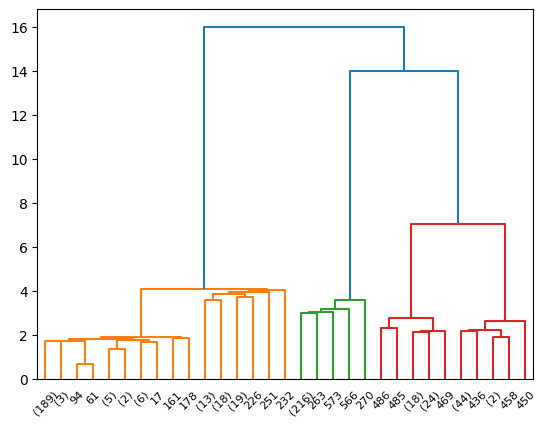

In [5]:
# visualize the hierarchical tree of the clustering results, i.e., dendrogram
plot_dendrogram(cluster_tree, truncate_mode="level", p=5)

In [31]:
# Visualize clusters
numCluster = 5

aCT = AgglomerativeClustering(linkage = 'single', n_clusters=numCluster)

aCT.fit(data)

clusterLabels = aCT.labels_.astype(int)


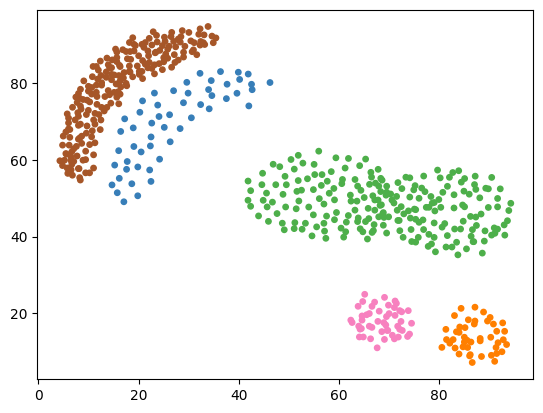

In [32]:
colors = np.array( ["#377eb8", "#ff7f00", "#4daf4a", "#f781bf", "#a65628", "#984ea3","#999999", "#e41a1c", "#dede00"] )
fig = plt.scatter(data['Feature1'], data['Feature2'], s=15, color=colors[clusterLabels])

#### Highly recommend check this URL after the class
https://scikit-learn.org/stable/auto_examples/cluster/plot_linkage_comparison.html#sphx-glr-auto-examples-cluster-plot-linkage-comparison-py